In [2]:
# imports
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [8]:
df = pd.read_csv("/Users/mareikekeller/air_quality/data/cleaned_data_old.csv")
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.07,15.45,"269,997.00",0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26,11.39,"124,579.00",0.10,25.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.31,14.29,"193,814.00",0.10,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.80,13.04,"146,631.00",0.10,21.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.21,16.37,NaN,0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Daten für 2014 & 2025 entfernen, weil zu wenige Datenpunkte

df = df[(df["Year"] >= 2014) & (df["Year"] <= 2025)]

In [10]:
# Tehran komplett entfernen, weil die Schadstoffwerte zu sehr von allen übrigen Städten abweichen
df = df[df["City"] != "Tehran"]

In [11]:
# Display the first 5 rows of the dataframe
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.07,15.45,"269,997.00",0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26,11.39,"124,579.00",0.10,25.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.31,14.29,"193,814.00",0.10,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.80,13.04,"146,631.00",0.10,21.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.21,16.37,NaN,0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Spalten mit zu vielen fehlenden Werten entfernen

# Berechnen, wie viele Prozent der Werte pro Spalte fehlen
missing_percent = df.isna().mean() * 100  
missing_percent


Year           0.00
Month          0.00
Day            0.00
Country        0.00
City           0.00
Latitude       0.17
Longitude      0.17
Population    78.51
Co            37.33
No2           16.91
O3            22.03
Pm10          20.20
Pm25          15.52
Pressure      23.18
So2           31.49
Temperature   22.81
Wind-gust     54.16
Wind-speed    24.34
Dew           41.04
Humidity      22.91
Tavg          17.15
Tmin          18.64
Tmax          18.74
Prcp          38.58
Wdir          30.90
Wspd          26.82
Pres          28.93
dtype: float64

In [13]:
# Spalten auswählen, die weniger als 53% fehlende Werte haben
df_cleaned = df.loc[:, missing_percent <= 53]

df_cleaned.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Co,No2,O3,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.07,15.45,0.10,9.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26,11.39,0.10,25.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.31,14.29,0.10,14.20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.80,13.04,0.10,21.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.21,16.37,0.10,9.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Ergebnis ausgeben
print(f"Anzahl der entfernten Spalten: {df.shape[1] - df_cleaned.shape[1]}")
print("Übrige Spalten:", df_cleaned.columns)

Anzahl der entfernten Spalten: 2
Übrige Spalten: Index(['Year', 'Month', 'Day', 'Country', 'City', 'Latitude', 'Longitude',
       'Co', 'No2', 'O3', 'Pm10', 'Pm25', 'Pressure', 'So2', 'Temperature',
       'Wind-speed', 'Dew', 'Humidity', 'Tavg', 'Tmin', 'Tmax', 'Prcp', 'Wdir',
       'Wspd', 'Pres'],
      dtype='object')


In [19]:
weather_vars = ["Dew", "Humidity", "Pressure", "Temperature", "Wind-speed"]

df_weather = df_cleaned.groupby("City")[weather_vars].mean()
df_weather.head()

,Dew,Humidity,Pressure,Temperature,Wind-speed
City,,,,,
Abha,6.63,49.48,"1,023.08",19.35,3.83
Abidjan,24.95,87.61,"1,011.24",27.16,3.12
Abu dhabi,18.72,56.65,"1,007.64",28.90,2.98
Accra,23.69,82.77,"1,011.41",27.08,4.30
Adana,12.70,67.31,"1,012.07",19.65,2.78


In [20]:
df_weather.isna().sum()

Dew            16
Humidity        0
Pressure        0
Temperature     0
Wind-speed      0
dtype: int64

In [21]:
df_weather[df_weather.isna().any(axis=1)]

,Dew,Humidity,Pressure,Temperature,Wind-speed
City,,,,,
Ashkelon,NaN,58.80,"1,016.10",13.86,2.25
Auckland,NaN,63.77,"1,016.04",13.76,1.52
Boston,NaN,67.31,"1,015.92",11.34,3.81
Bristol,NaN,81.70,"1,014.79",11.17,3.04
Munich,NaN,79.63,"1,016.59",9.98,1.56
Newport,NaN,83.24,"1,013.80",11.00,2.59
Oakland,NaN,76.14,"1,016.53",13.92,2.57
Omaha,NaN,64.35,"1,015.22",11.84,2.26
Plymouth,NaN,84.12,"1,015.76",11.92,4.34


In [22]:
# Fehlende Werte interpolieren: lineare Interpolation; die ist möglich, weil wir Daten aus mehreren Jahren haben, d.h. wir schätzen die fehlenden Werte anhand der Werte, die vor und nach dem fehlenden Wert liegen

df_weather = df_weather.dropna(subset=weather_vars)
df_weather.shape

# Taupunkte für 17 Städte sind Quatsch!

(599, 5)

In [23]:
df_weather.head()

,Dew,Humidity,Pressure,Temperature,Wind-speed
City,,,,,
Abha,6.63,49.48,"1,023.08",19.35,3.83
Abidjan,24.95,87.61,"1,011.24",27.16,3.12
Abu dhabi,18.72,56.65,"1,007.64",28.90,2.98
Accra,23.69,82.77,"1,011.41",27.08,4.30
Adana,12.70,67.31,"1,012.07",19.65,2.78


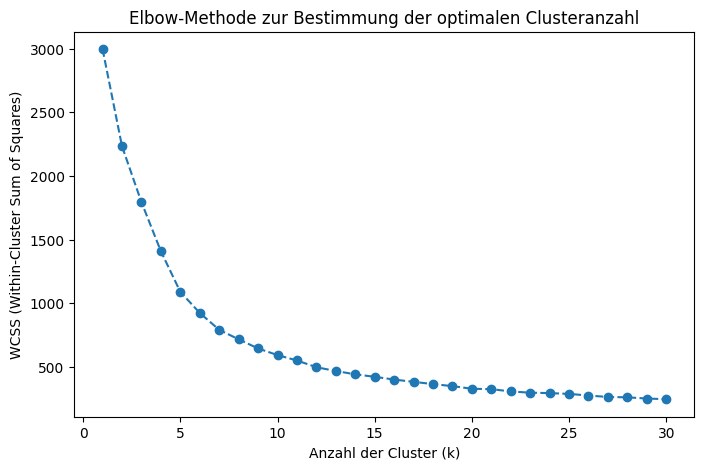

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Wetterdaten skalieren (K-Means ist empfindlich gegenüber Skalen)
scaler = StandardScaler()
df_weather_scaled = scaler.fit_transform(df_weather)

# Optimale Clusteranzahl bestimmen (Elbow-Methode)
wcss = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_weather_scaled)
    wcss.append(kmeans.inertia_)

# Elbow-Plot anzeigen
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), wcss, marker="o", linestyle="--")
plt.xlabel("Anzahl der Cluster (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow-Methode zur Bestimmung der optimalen Clusteranzahl")
plt.show()


In [25]:
# K-Means mit k=5 durchführen
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_weather["Weather_Cluster"] = kmeans.fit_predict(df_weather_scaled)

In [26]:
df_weather.head()

,Dew,Humidity,Pressure,Temperature,Wind-speed,Weather_Cluster
City,,,,,,
Abha,6.63,49.48,"1,023.08",19.35,3.83,2
Abidjan,24.95,87.61,"1,011.24",27.16,3.12,3
Abu dhabi,18.72,56.65,"1,007.64",28.90,2.98,3
Accra,23.69,82.77,"1,011.41",27.08,4.30,3
Adana,12.70,67.31,"1,012.07",19.65,2.78,3


In [27]:
df_weather.index = df_weather.index.str.title()
df_weather.head()

,Dew,Humidity,Pressure,Temperature,Wind-speed,Weather_Cluster
City,,,,,,
Abha,6.63,49.48,"1,023.08",19.35,3.83,2
Abidjan,24.95,87.61,"1,011.24",27.16,3.12,3
Abu Dhabi,18.72,56.65,"1,007.64",28.90,2.98,3
Accra,23.69,82.77,"1,011.41",27.08,4.30,3
Adana,12.70,67.31,"1,012.07",19.65,2.78,3


In [36]:
# Neue Cluster-Zuordnung der Städte anzeigen
# df_weather_numbers = df_weather[["Weather_Cluster"]].sort_values(by="Weather_Cluster")
# df_weather_numbers

In [30]:
df_pollutants = pd.read_csv("df_pollutants.csv", index_col=0)  # Index wiederherstellen
df_pollutants.head()  # Überprüfen, ob die Daten korrekt geladen wurden


,Co,No2,O3,So2,Pm10,Pm25,Cluster
City,,,,,,,
Abu dhabi,0.10,12.20,27.72,4.99,79.44,97.85,1
Adana,4.05,11.25,16.47,4.18,31.49,68.21,2
Adapazarı,18.37,12.70,16.36,19.66,38.06,72.09,3
Adelaide,2.45,20.03,23.99,8.58,13.29,16.64,0
Aguascalientes,7.19,16.04,44.53,4.89,70.22,106.46,1


In [31]:
df_combined = df_weather.merge(df_pollutants, left_index=True, right_index=True)



In [32]:
df_combined.head()

,Dew,Humidity,Pressure,Temperature,Wind-speed,Weather_Cluster,Co,No2,O3,So2,Pm10,Pm25,Cluster
City,,,,,,,,,,,,,
Adana,12.70,67.31,"1,012.07",19.65,2.78,3,4.05,11.25,16.47,4.18,31.49,68.21,2
Adapazarı,10.10,77.67,"1,014.78",13.01,1.83,1,18.37,12.70,16.36,19.66,38.06,72.09,3
Adelaide,8.65,61.72,"1,017.15",16.54,4.17,1,2.45,20.03,23.99,8.58,13.29,16.64,0
Aguascalientes,3.03,37.58,"1,010.48",17.86,2.88,2,7.19,16.04,44.53,4.89,70.22,106.46,1
Akita,8.84,75.06,"1,011.15",13.39,3.73,1,3.02,5.20,29.35,1.88,10.26,38.94,0


In [33]:
len(df_combined)

345

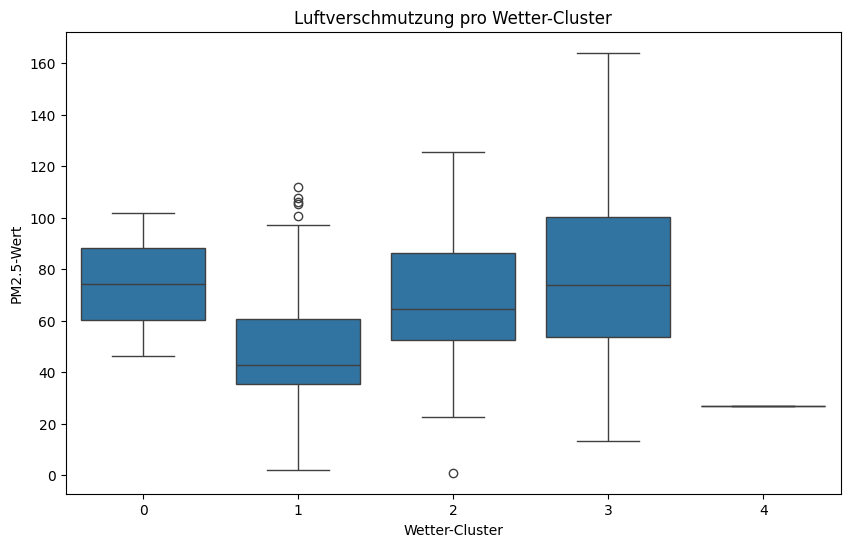

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Weather_Cluster", y="Pm25", data=df_combined)
plt.xlabel("Wetter-Cluster")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung pro Wetter-Cluster")
plt.show()


In [36]:
# Abweichung vom Cluster-Durchschnitt berechnen
df_combined["pm25_deviation"] = df_combined.groupby("Weather_Cluster")["Pm25"].transform(lambda x: x - x.mean())

# Städte mit deutlich höherer PM2.5-Belastung als ihr Cluster-Durchschnitt
outliers = df_combined[df_combined["pm25_deviation"] > df_combined["pm25_deviation"].std() * 1.5]

outliers


,Dew,Humidity,Pressure,Temperature,Wind-speed,Weather_Cluster,Co,No2,O3,So2,Pm10,Pm25,Cluster,pm25_deviation
City,,,,,,,,,,,,,,
Anyang,6.60,56.83,992.76,15.76,2.40,2,9.12,15.36,27.07,9.11,76.00,125.50,1,56.60
Chandigarh,16.58,71.75,763.99,23.30,1.31,3,5.06,8.65,12.46,3.71,74.75,121.98,1,44.90
Changzhou,12.46,74.43,"1,016.28",17.11,1.89,1,7.47,15.51,26.45,5.96,54.19,105.51,1,57.17
Chengdu,13.03,70.18,992.75,17.77,1.42,1,6.94,16.10,20.38,3.49,54.62,107.81,1,59.47
Delhi,16.11,61.38,984.84,26.00,1.05,3,9.36,16.46,9.19,5.43,130.13,164.14,1,87.06
Dubai,18.09,50.35,"1,007.51",30.06,3.24,3,3.29,19.59,14.90,14.55,64.11,118.23,1,41.15
Ghāziābād,16.14,58.88,831.22,28.55,1.08,3,10.02,20.96,11.17,6.86,117.04,149.45,1,72.37
Harbin,-0.11,66.09,998.74,5.37,3.08,1,6.84,14.37,30.57,8.78,50.21,95.18,1,46.85
Hefei,11.25,69.90,"1,003.42",16.71,2.52,1,6.62,14.95,32.28,4.34,55.44,106.09,1,57.76


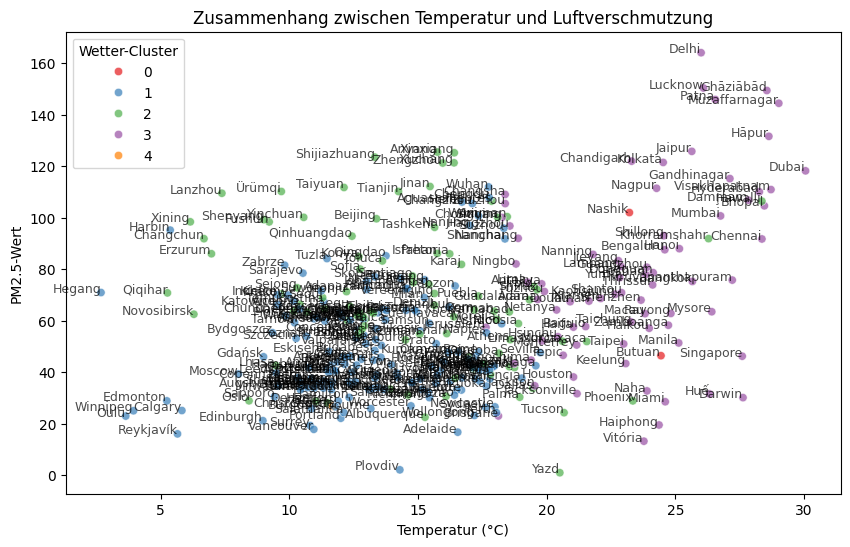

In [38]:
# Sicherstellen, dass "City" eine normale Spalte ist
df_combined = df_combined.reset_index()

# Scatterplot erstellen
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x=df_combined["Temperature"], 
    y=df_combined["Pm25"], 
    hue=df_combined["Weather_Cluster"], 
    palette="Set1", 
    alpha=0.7
)

# Städtenamen als Labels hinzufügen
for i, row in df_combined.iterrows():
    plt.text(row["Temperature"], row["Pm25"], row["City"], fontsize=9, ha="right", alpha=0.7)

# Achsen & Titel
plt.xlabel("Temperatur (°C)")
plt.ylabel("PM2.5-Wert")
plt.title("Zusammenhang zwischen Temperatur und Luftverschmutzung")
plt.legend(title="Wetter-Cluster")

plt.show()


Abu Dhabi 🇦🇪	Wüstenstaub (natürliche PM2.5), Öl-Industrie, wenig Wind

Delhi 🇮🇳	Verkehr, Industrie, Kohlekraftwerke, Wetter-Inversionen

Shijiazhuang 🇨🇳	Starke Industrialisierung (Stahlproduktion), Kohlekraftwerke

Ulan Bator 🇲🇳	Kohleheizungen im Winter, extreme Kälte, Luftstagnation

## Analyse zum Einfluss der Jahreszeit

In [40]:
df_city_avg = df.groupby("City")[["Year", "Month", "Pm25"]].mean().reset_index()
df_city_avg.head()

,City,Year,Month,Pm25
0,Abha,"2,019.96",6.58,NaN
1,Abidjan,"2,022.10",6.60,69.14
2,Abu dhabi,"2,020.87",5.97,97.85
3,Accra,"2,021.87",6.55,70.51
4,Adana,"2,020.19",5.71,68.21


In [41]:
len(df_city_avg)

615

In [42]:
df_combined.head()

,index,City,Dew,Humidity,Pressure,Temperature,Wind-speed,Weather_Cluster,Co,No2,O3,So2,Pm10,Pm25,Cluster,pm25_deviation
0,0,Adana,12.70,67.31,"1,012.07",19.65,2.78,3,4.05,11.25,16.47,4.18,31.49,68.21,2,-8.86
1,1,Adapazarı,10.10,77.67,"1,014.78",13.01,1.83,1,18.37,12.70,16.36,19.66,38.06,72.09,3,23.76
2,2,Adelaide,8.65,61.72,"1,017.15",16.54,4.17,1,2.45,20.03,23.99,8.58,13.29,16.64,0,-31.70
3,3,Aguascalientes,3.03,37.58,"1,010.48",17.86,2.88,2,7.19,16.04,44.53,4.89,70.22,106.46,1,37.56
4,4,Akita,8.84,75.06,"1,011.15",13.39,3.73,1,3.02,5.20,29.35,1.88,10.26,38.94,0,-9.39


In [43]:
len(df_combined)

345

In [46]:
# Nur die relevanten Spalten behalten
df_monthly = df_cleaned[["City", "Year", "Month", "Pm25"]].copy()

# Sicherstellen, dass "City" ein String ist
df_monthly["City"] = df_monthly["City"].astype(str)
df_combined["City"] = df_combined["City"].astype(str)

# Merge mit den Wetter-Clustern aus df_combined
df_with_month = df_monthly.merge(df_combined[["City", "Weather_Cluster", "Cluster"]], on="City", how="left")

# Überprüfen, ob der Merge funktioniert hat
print(df_with_month.head())
print(df_with_month.isna().sum())  # Prüfen, ob Werte fehlen



        City  Year  Month  Pm25  Weather_Cluster  Cluster
0       Graz  2014     12   NaN              NaN      NaN
1  Innsbruck  2014     12   NaN              NaN      NaN
2       Linz  2014     12 74.00              NaN      NaN
3   Salzburg  2014     12   NaN              NaN      NaN
4     Vienna  2014     12 65.00              NaN      NaN
City                    0
Year                    0
Month                   0
Pm25               262534
Weather_Cluster    671085
Cluster            671085
dtype: int64


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df_with_month, x="Month", y="Pm25", hue="City", marker="o")
# plt.xlabel("Monat")
# plt.ylabel("PM2.5-Wert")
# plt.title("Luftverschmutzung (PM2.5) in verschiedenen Monaten")
# plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
# plt.legend(title="Stadt")
# plt.show()


In [48]:
# Nur die drei relevanten Städte auswählen
selected_cities = ["Delhi", "Shijiazhuang", "Ulan Bator", "Abu Dhabi"]
df_winter = df_with_month[df_with_month["City"].isin(selected_cities)]


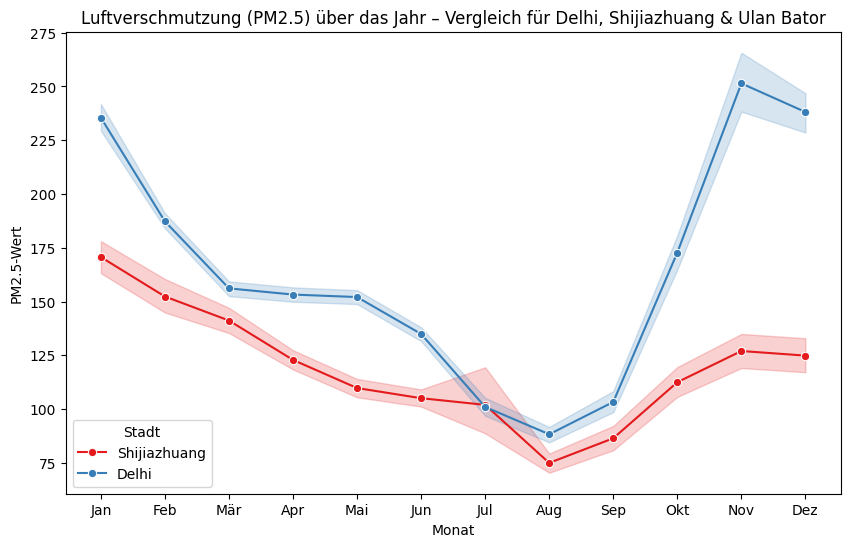

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_winter, x="Month", y="Pm25", hue="City", marker="o", palette="Set1")
plt.xlabel("Monat")
plt.ylabel("PM2.5-Wert")
plt.title("Luftverschmutzung (PM2.5) über das Jahr – Vergleich für Delhi, Shijiazhuang & Ulan Bator")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.legend(title="Stadt")

# plt.savefig("../Images/pm25_per_month_top_4.png", dpi=300, bbox_inches="tight")

plt.show()
